<a href="https://colab.research.google.com/github/daniel-usp/MBA-BIA-USP/blob/main/Casos-Machine-Learning/decision_tree_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Árvores de Decisão em Machine Learning

---

## 📌 O que é uma Árvore de Decisão?

Uma árvore de decisão é um modelo de aprendizado de máquina que representa decisões em formato de diagrama hierárquico, semelhante a um fluxograma.  

- Cada **nó interno** da árvore faz uma pergunta (condição sobre uma variável de entrada).  
- Conforme a resposta, seguimos por uma das **ramificações** até outro nó ou até uma **folha** (nó terminal).  
- As **folhas** correspondem às decisões ou previsões finais do modelo ✅❌.  

👉 Em Machine Learning supervisionado:
- Pode ser usada para **classificação** (ex: aprovar ou negar empréstimo).  
- Pode ser usada para **regressão** (ex: prever valor numérico).  

📊 O algoritmo aprende automaticamente quais perguntas fazer analisando os dados de treinamento.  
💡 Vantagem: modelo altamente **interpretável**, pois a lógica fica explícita nos nós e ramificações.

---

## 💼 Aplicações em Finanças e Negócios

- **Crédito**: análise de risco e aprovação/negação de empréstimos.  
- **Fraude**: detectar padrões de transações suspeitas.  
- **Marketing/CRM**: segmentar clientes e personalizar ofertas.  

✨ Em áreas reguladas (ex: bancos, saúde), árvores são ideais pela **transparência**.

---

## 📐 Coeficiente de Gini e Impureza

Para construir uma árvore, é preciso escolher em cada nó a **melhor divisão**.  
Essa escolha depende da **pureza** dos subconjuntos formados.

🎲 **Intuição do Gini**:
- **Gini = 0** → nó puro (todos da mesma classe).  
- **Gini alto (~0,5 binário)** → mistura forte de classes (máxima incerteza).  

🔢 Fórmula (caso binário):

$G = 1 - (p_1^2 + p_2^2) = 2 \cdot p_1 (1 - p_1)$


Exemplo:
- 50%/50% → G = 0,5 (máxima impureza).  
- 100% de uma classe → G = 0 (puro).  

👉 Analogia: moeda equilibrada (50/50) = máxima incerteza 🎲, moeda viciada (100% cara) = certeza.

---

## 🧮 Exemplo Ilustrativo do Gini

Conjunto com 20 exemplos:  
- 10 da Classe A, 10 da Classe B → G = 0,5 (máx. impuro).  
- Nó com 18 A e 2 B → G = 0,18 (muito mais puro).  
- Nó com 12 A e 8 B → G = 0,48 (ainda impuro).  

🔎 Quanto menor o **Gini**, mais homogêneo o nó → melhor divisão!

---

## 📊 Exemplo Prático: Mini Base de Empréstimo

| Estado Civil | Renda (R$) | Aprovado? |
|--------------|------------|-----------|
| Solteiro     | 1000       | Não (0)   |
| Casado       | 2000       | Sim (1)   |
| Solteiro     | 3500       | Não (0)   |
| Casado       | 4000       | Sim (1)   |
| Solteiro     | 5000       | Sim (1)   |

📌 5 observações:  
- 3 solteiros, 2 casados.  
- 3 aprovações, 2 reprovações.  

---

### 1️⃣ Impureza do nó raiz
- p(Sim) = 3/5 = 0,6  
- p(Não) = 2/5 = 0,4  
- $G_{raiz} = 1 - (0,6^2 + 0,4^2) = 0,48$


---

### 2️⃣ Candidato de divisão: Estado Civil
- **Solteiros**: 2 “Não” e 1 “Sim” → G = 0,44  
- **Casados**: 2 “Sim” → G = 0  
- G pós-split = 0,27 ✅ (boa divisão)

---

### 3️⃣ Candidato de divisão: Renda (ex: threshold 3500)
- <3500: 2 “Não”, 1 “Sim” → G = 0,44  
- $ \geq 3500$: 2 “Sim” → G = 0  
- G pós-split = 0,27 ✅ (mesmo resultado de Estado Civil)

---

### 4️⃣ Escolha do melhor corte
Ambas divisões (Estado Civil ou Renda 3500) dão G = 0,27.  
O algoritmo escolhe **Estado Civil** (mais simples e gera nó puro direto).

---

### 5️⃣ Refinamento no ramo Solteiro
- Solteiro com Renda ≤4250 → 2 “Não” → G = 0  
- Solteiro com Renda >4250 → 1 “Sim” → G = 0  

✅ Nós folhas puros → critério de parada.

---

## 🌲 Árvore Final

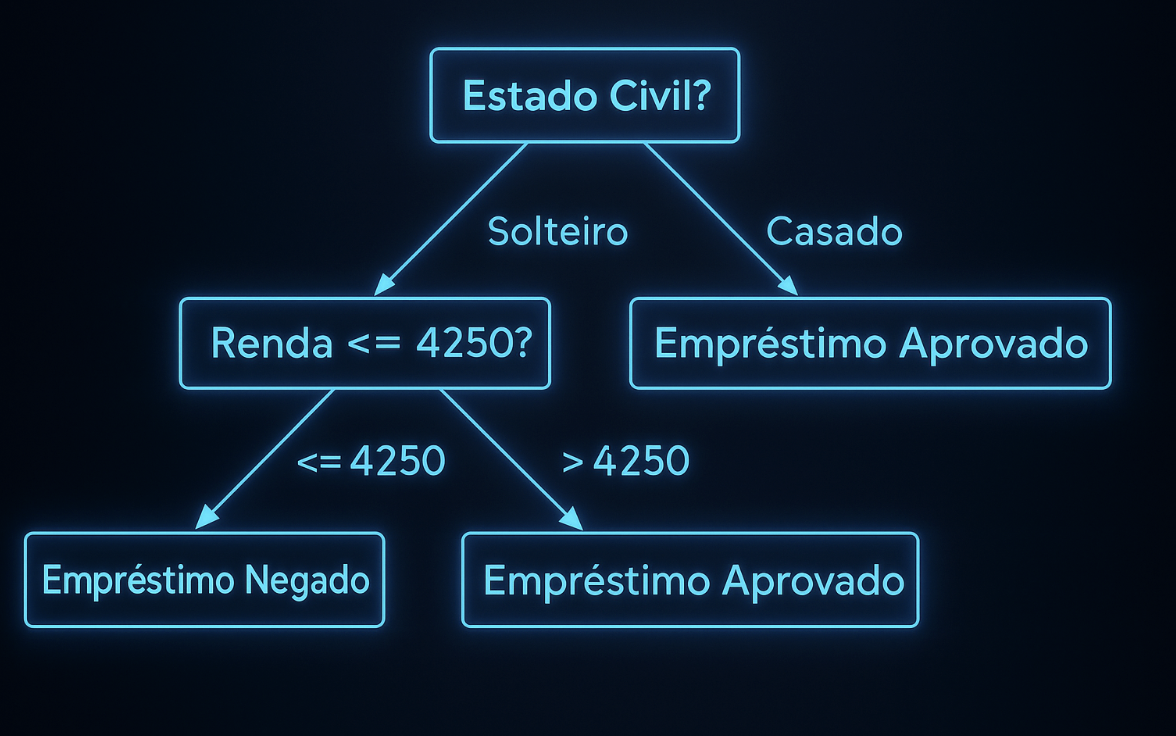

# 🌳 Decision Tree Regression: Tutorial
### Análise com dados de vendas de sorvetes em João Pessoa (PB)

---

## 📘 Resumo
Este estudo apresenta a construção de uma **Árvore de Decisão Regressora** aplicada à previsão de **vendas de sorvetes** com base em duas variáveis explicativas: **Temperatura** e **Domingo**.  

- 🎯 Medida de impureza: **desvio-padrão** $(\sigma)$
- 🔎 Descrição: cálculo da impureza inicial, avaliação de splits e árvore final  
- 📈 Interpretação gerencial: modelo interpretável e útil para segmentação de mercado  
- ☝️ Nota didática: usar $(\sigma)$ ou $(\sigma^2)$ leva à mesma ordenação dos splits.

---

## 🌲 Conceito de Árvores de Regressão
- Segmentam os dados em **regiões homogêneas** em relação à variável dependente \(Y\).  
- Critério de divisão: minimizar a variabilidade de $(Y)$ nos nós filhos.  
- Previsão em cada folha = **média** dos valores da variável alvo.

---

## 📐 Medida de Impureza: Desvio-Padrão
O desvio-padrão $(\sigma)$ expressa a dispersão dos valores em torno da média.  

$$
\sigma_{\text{pós}} = \sum_{k=1}^{K}\frac{n_k}{n}\,\sigma(S_k),
\qquad
\Delta = \sigma(S) - \sigma_{\text{pós}}
$$

- Quanto maior $(\Delta)$, maior a redução da incerteza 🎯.

---

## 📊 Base Empírica
13 dias de vendas $(Y)$ com 2 variáveis explicativas:

- 🌡️ **Temperatura**: quente, ameno ou frio  
- 📅 **Domingo**: sim ou não  

| Dia | Temperatura | Domingo | Vendas |
|-----|-------------|---------|--------|
| 1   | quente      | sim     | 286    |
| 2   | frio        | não     | 147    |
| 3   | ameno       | não     | 169    |
| 4   | frio        | sim     | 172    |
| 5   | ameno       | não     | 176    |
| 6   | quente      | não     | 253    |
| 7   | quente      | não     | 238    |
| 8   | frio        | não     | 151    |
| 9   | frio        | sim     | 168    |
| 10  | quente      | não     | 264    |
| 11  | ameno       | sim     | 207    |
| 12  | quente      | sim     | 309    |
| 13  | quente      | não     | 245    |

---

## 🌱 Impureza no Nó Raiz
$
\bar{y}_{\text{raiz}} \approx 221{,}9,
\qquad
\sigma_{\text{raiz}} \approx 52{,}35
$

---

## ✂️ Avaliação de Splits

### 🔸 Split por Temperatura
| Grupo | n | $(\bar{y})$ | $(\sigma)$ |
|-------|---|--------------|-------------|
| quente | 6 | 265,8 | 24,63 |
| frio   | 4 | 159,5 | 10,69 |
| ameno  | 3 | 184,0 | 16,51 |

$
\sigma_{\text{pós}} \approx 18{,}47, \quad \Delta \approx 33{,}88
$

---

### 🔸 Split por Domingo
| Grupo | n | $(\bar{y})$ | $(\sigma)$ |
|-------|---|--------------|-------------|
| sim   | 5 | 228,4 | 58,48 |
| não   | 8 | 218,6 | 45,95 |

$
\sigma_{\text{pós}} \approx 50{,}77, \quad \Delta \approx 1{,}58
$

📌 **Conclusão:** Temperatura é mais explicativa no nó raiz.

---

## 🌡️ Refinamentos

- **Temperatura = quente**:  
  Divisão por Domingo →  
  sim: $(\hat{y} \approx 297,5)$, não: $(\hat{y} \approx 250)$.  
  $(\sigma \downarrow 24,63 \to 10,28)$.  

- **Temperatura = frio**:  
  Domingo → vendas médias $170$ (sim) e $149$ (não).  

- **Temperatura = ameno**:  
  Domingo → sim $(\hat{y} = 207)$, não $(\hat{y} = 172,5)$.   

---

## 🌳 Árvore Final

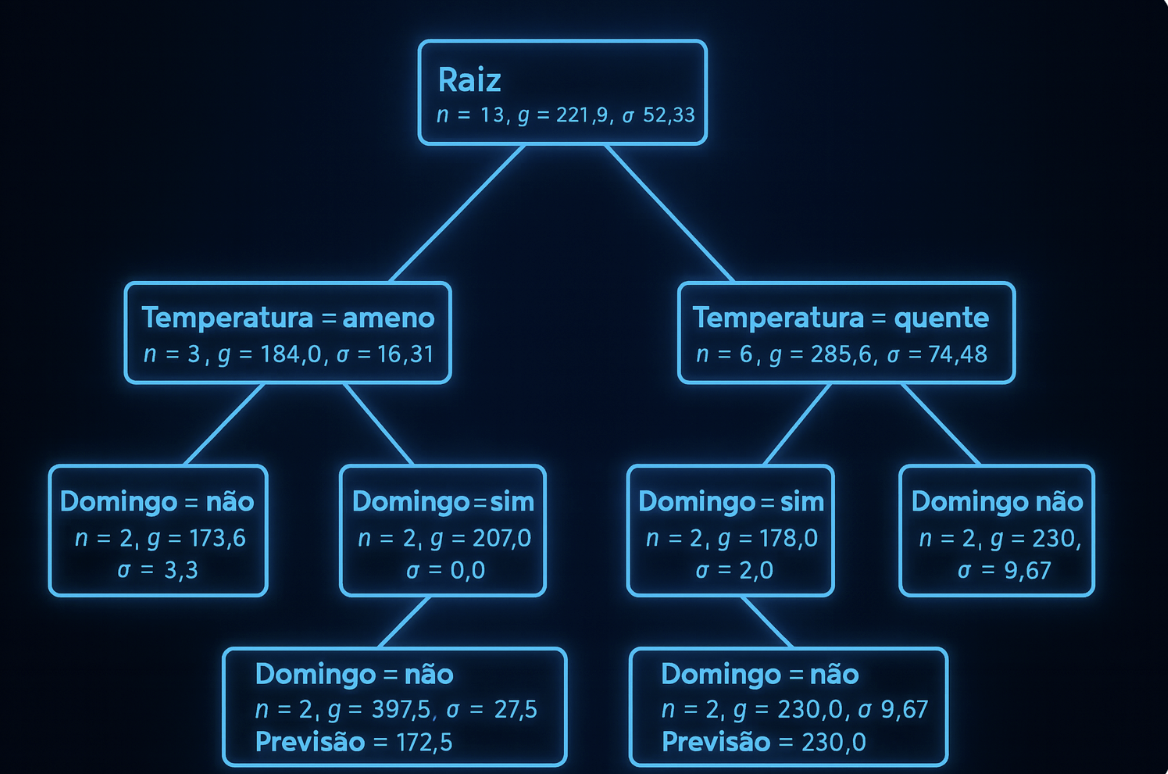